# Rheology. A brief introduction

## 1. Classification of fluids

This notebook is based principally on the [book by Irgens](https://discovery.upc.edu/permalink/34CSUC_UPC/rdgucl/alma991004877454506711) and also on the classical [book by Bird](https://discovery.upc.edu/permalink/34CSUC_UPC/rdgucl/alma991000497999706711). Also chapter chapter 7 in the book of [Engineerign Fluid Mechanics, by H. Yamaguchi](https://discovery.upc.edu/permalink/34CSUC_UPC/rdgucl/alma991004878455306711) has been used.

Very briefly, when we have studied Fluid Mechanics, we have focused on fluids that meet Newton's law for shear stress,

$$ \tau = \mu \dot\gamma \tag{1}$$

for 2-D flow, where $\tau$ is the shear stres, $\dot\gamma$ is the shear rate. $\mu$ is the _dynamic viscosity_, or just _viscosity_, of the fluid.

Water, air and other molecularly simple fluids obey this law. But most of the liquids do not. [Rheology](https://en.wikipedia.org/wiki/Rheology) is the branch of science and technology that studies this kind of non-linear behaviour, both in solids and in fluids. We are focusing in this part in the rheology of fluids.

A fluid is called _pure viscous_ if the shear rate is only function of shear stress

$$ \tau = f(\dot\gamma) \tag{2}$$

This function can be linear in the case of **Newtonian fluids** or non-linear in the case of **non Newtonian fluids** (also known as rheological fluids). 

In general, for pure viscous fluids, an _apparent viscosity_ can be defined as

$$ \mu (\dot\gamma) = \frac{\tau}{\dot\gamma} \tag{3}$$

The most common model is the **Generalized Newtonian Fluids**, that is modeled with the [**power law**](https://en.wikipedia.org/wiki/Power-law_fluid), also known as Ostwald-de Waele law, where shear stress is modelled as

$$ \tau = K \dot\gamma^n \tag{4}$$

so 

$$ \mu(\dot\gamma) = K (\dot{\gamma})^{n-1} \tag{5}$$

$K$ is the _consistency parameter_ and $n$ is the power law index

* When $n = 1$ the fluid is Newtonian and $K$ is just its viscosity
* When $n < 1$ apparent viscosity decreases with shear rate and the fluid is classified as _pseudoplastic_ or [_shear thinning_](https://en.wikipedia.org/wiki/Shear_thinning). Most non-Newtonian fluids are of this type, like paints, [blood](http://www.maths.gla.ac.uk/~xl/Arasu-biofluid.pdf), and most of food liquids (juices, creams, soups,...)
* When $n > 1$ apparent viscosity increases with shear rate and the fluid is known as dilatant or [_shear thickening_](https://en.wikipedia.org/wiki/Dilatant#Examples). This is much less common, and the typical example is the cornstarch (maicena) which allow [funny experiments](https://www.youtube.com/watch?v=q-DZ0f0_NCA)

![image.png](powerLawRheogram.png)

Other type of behavior is the [**viscoplastic fluid**](https://en.wikipedia.org/wiki/Viscoplasticity) that behave as solid for a shear stress lower than a limit value, known as _yield shear stress_, and as a fluid fow larger values of the shear stress.

![image.png](BinghamRheogram.png)

The most simple model is the [_Bingham fluid_](https://en.wikipedia.org/wiki/Bingham_plastic) ([Bingham](https://en.wikipedia.org/wiki/Eugene_C._Bingham) was the inventor of the name "Rheology"). Theses fluids behave like newtonian for shear stress larger than the yield shear stress. This model is tipycally used for toothpaste, mud or slurries. It is mathematically modeled as 

$$ \tau(\dot\gamma) = \tau_y + \mu \dot\gamma \tag{6}$$

There are also some **Time Dependent** models as [_Thixotropic fluids_](https://en.wikipedia.org/wiki/Thixotropy) when shear stress decreases in time for a constant shear rate, and [_Rheopectic fluids_](https://en.wikipedia.org/wiki/Rheopecty) otherwise. These kind of fluids are beyond the scope of this course


## 2. Generalized Newtonian Fluids

### Power Law Fluid in a pipe

Let's consider a very slow flow and/or very small, so that inertial and time terms can be neglected.

We have seen in Fluid Mechanics that for a Newtonian Fluid, [Hagen-Poiseuille law](https://en.wikipedia.org/wiki/Hagen%E2%80%93Poiseuille_equation#Derivation) holds, according to the Navier Stokes equation for a laminar, viscous flow

$$
0 =  -\frac{\partial p}{\partial z} + \frac{1}{r}\frac{\partial}{\partial r}\left(r \tau_{rz}\right) \tag{7}
$$

giving a paraboloid velocity profile and a flowrate

$$ Q = \frac{\Delta p \pi R^4}{8\mu L} \tag{8}$$

provided that, as a Newtonian fluid, $\tau_{rz} = \mu \dot\gamma = \mu \frac{\partial u_z}{\partial r} $.

Now, with a Power Law Fluid, $\tau_{rz} = K(\dot\gamma)^n$, it leads to 

$$ \frac{\text{d} u_z}{\text{d}r} = \left[ \frac{1}{2K}\left(\frac{\text{d}p}{\text{d}z}\right)r\right]^\frac{1}{n} = \left[ \frac{1}{2K}\left(-\frac{\Delta p}{L}\right)r\right]^\frac{1}{n} \tag{9} $$

In [16]:
import numpy as np
import sympy as sp
sp.init_printing()
from IPython.display import display, Math

In [17]:
K,Deltap,L,r,n,R = sp.symbols('K {\Delta}p L r n R',positive=True)
uz = sp.Function('u_z')

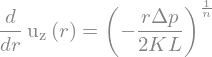

In [18]:
Eq = sp.Eq(uz(r).diff(r),(1/(2*K)*(-Deltap/L)*r)**(1/n))
display(Eq)

First, we integrate it and try to simplify it a little bit ...

In [19]:
exp = (1/(2*K)*(-Deltap/L)*r)**(1/n)

In [22]:
uz = sp.integrate(exp,(r,r,R)).simplify()
uz.simplify()
display(Math('u_z(r) ='+sp.latex(uz)))

<IPython.core.display.Math object>

In [24]:
uz = uz.factor(deep=True).powsimp()
display(Math('u_z(r) ='+sp.latex(uz)))

<IPython.core.display.Math object>

... just to integrate it again and obtain the flow rate in the pipe.

In [25]:
Q = 2*sp.pi*sp.integrate(uz*r,(r,0,R)).simplify().powsimp()
display(Math('Q ='+sp.latex(Q)))

<IPython.core.display.Math object>

In [26]:
Q = Q.simplify()
display(Math('Q ='+sp.latex(Q)))

<IPython.core.display.Math object>

and, from here, the average velocity, so that we can normalize velocity profile

In [28]:
u_avg = Q/(sp.pi*R**2)
display(Math('\overline{u} = '+sp.latex(u_avg)))

<IPython.core.display.Math object>

In [29]:
u_dimless = uz/u_avg
u_dimless = u_dimless.simplify()
display(Math('u^* = '+sp.latex(u_dimless)))

<IPython.core.display.Math object>

In order to get it in dimensionless form, we just impose $R=1$ so that now $r$ is the dimensionless radius $0<r/R<1$

In [30]:
u_dimless = u_dimless.subs(R,1)
display(Math('u^* = '+sp.latex(u_dimless)))

<IPython.core.display.Math object>

### Plot of the velocity profile

We are now plotting this dimensionless profile in order to see the effect of the parameter $n$.

First we _lambdify_ the expression (that is, remember, to convert it to a numerical function of two variables in this case)

In [31]:
u_np = sp.lambdify((n,r),u_dimless)

In [32]:
u_np(1,0.25) # Just to check it

Now the [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) module is used. It is very useful to make interactive widgets. It only works in a dynamic environment, with a kernel; so you have to download the notebook and run it in Jupyterlab or Google Colaborative.

In [33]:
from ipywidgets import interactive
import matplotlib.pyplot as plt

In [35]:
def f(n):
    plt.figure(1,frameon=False)
    x = np.linspace(-1, 1, num=500)
    plt.xlim(-1, 1)
    plt.ylim(0,3)
    plt.plot(x,u_np(n,np.abs(x)),linewidth=4)
    plt.plot(x,u_np(1,np.abs(x)),'--',label=r'$n=1$')
    plt.legend()
    plt.show()

interactive_plot = interactive(f, n=(0.01, 2,0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='n', max=2.0, min=0.01, step=0.01), Output(layout=Lay…

### Exercise 1
Check that dimensionless flowrate is independent of $n$. What is its value?

### Exercise 2

Reynolds number for power law fluids is defined differently than for a Newtonian fluid. Provided that the dimensionless stress $\tau^*$ should be written in terms of a dimensionless strain rate $\gamma^*$ as 

$$ \tau^* = \frac{1}{\text{Re}_n}\left(\gamma^*\right)^n $$

Find the definition of $\text{Re}_n$

This number defines the similarity when experiments with two different power law fluids are performed.

### Exercise 3

As an exercise for this topic, it is proposed to make a similar study: the laminar velocity profile in a pipe for a Bingham plastic 



## 3. Viscoelastic fluids

This is a complicated topic. Several constitutive equations have been proposed according to experimental results. Viscoelastic materials have both viscous and elastic behavior. Some examples are rubbers, melted glass and also some complex biofluids, as cytoplasm. 

Most of the cases in engineering can only be solved with CFD, due to the high non-linearity between constitutive equations, continuity and momentum balance. Here we are only focusing in simple cases with linear viscoelastic flows.

In general, constitutive equations for linear viscoelastic material are linear relationship between shear stress, shear rate and its time derivative.

$$ f(\tau, \frac{\text{d}^n \tau}{\text{d}t^n},\gamma, \frac{\text{d}^n \gamma}{\text{d}t^n}) = \sum_{n=0}^{N} \left( a_n \frac{\text{d}^n \tau}{\text{d}t^n} + b_n \frac{\text{d}^n \gamma}{\text{d}t^n}\right)= 0$$


### Maxwell element

The most fundamental model is the so-called **Maxwell element**, composed of a combination in series of a viscous element, with viscosity $\eta$ and a spring, with constant $G$. 


![Image](Maxwell.png)

In this case, both stresses are the same, $\tau_1= \tau_2$, and the displacements$\gamma$ are additive, $\gamma = \gamma_1 +\gamma_2$. By deriving this last expression an arranging terms, we get

$$ \tau + \lambda \dot\tau = \eta \dot\gamma $$

where $\lambda = \frac{\eta}{G}$ is the _relaxation time_.

In [36]:
%reset -f

In [37]:
import sympy as sp
import numpy as np

In [38]:
t = sp.symbols('t')
eta,G = sp.symbols('eta,G',positive=True,real=True)

In [39]:
gamma = sp.Function('gamma')
tau = sp.Function('tau')
gammaDot = sp.Function('gammaDot')

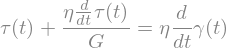

In [40]:
eq = sp.Eq(tau(t)+eta/G*tau(t).diff(t),eta*gamma(t).diff(t))
display(eq)

In order to properly solve this equation, the hint that it is an [Bernoulli Differential Equation](https://en.wikipedia.org/wiki/Bernoulli_differential_equation) has to be passed to the solver.

In [41]:
tauSol = sp.dsolve(eq,tau(t),hint='Bernoulli')

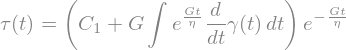

In [42]:
tauSol

Let's consider a first example in which $\gamma(t)$ is a [step function](https://en.wikipedia.org/wiki/Step_function) with $\gamma = 1$ for $t<0$ and then it is imposed as $\gamma = 0$ again for positive time.

In [43]:
tauStep = tauSol.replace(gamma(t),sp.Piecewise((1,t<0),(0,t>=0))).doit()
display(tauStep)

That is, stress is relaxed in time according to the value of viscosity and spring constant. Note that, in general, the value of the stress is not only function of $\gamma$ and its derivative but also, _of its history_.

$G e^{-\frac{t}{\lambda}}$ is the _relaxation modulus_. 

We could also write the expression for $\tau(t)$ in terms of $\gamma$ instead of $\dot\gamma$ by integrating by parts, and then we could obtain

$\tau(t) = - \int \frac{\eta}{\lambda^2}e^{-\frac{t}{\lambda}} \gamma(t) dt$

and the function $M(t) = \frac{\eta}{\lambda^2}e^{-\frac{t}{\lambda}}$ is called the _memory function_


Let's now consider that we impose to shear an harmonic constraint 

$$ \gamma(t) = a\sin(\omega t) $$

and we can measure stress.

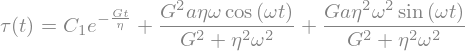

In [44]:
omega,a = sp.symbols('omega,a',positive=True,real=True)
tauSin = tauSol.replace(gamma(t),a*sp.sin(omega*t)).doit()
tauSin = tauSin.expand()
display(tauSin)

After a while, when relaxation time has passed, the first term, $C_1 e^{-\frac{Gt}{\eta}}$, can be neglected

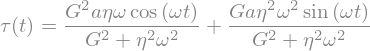

In [45]:
tauSinInf=tauSin.replace(tauSin.rhs.args[0],0)
display(tauSinInf)

The modulus that multiplies the sinus term is known as $G'$, the **storage modulus**, and measures the ability of the fluid to store elastic energy.

In [46]:
GPrime1,GPrime2 = sp.symbols('G\',G\'\'',positive=True,real=True)

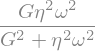

In [47]:
GPrime1 = tauSinInf.rhs.args[0]/(a*sp.sin(omega*t))
display(GPrime1)

The modulus that multiplies the cosinus term is known as $G''$, the **loss modulus**, and measures the ability of the fluid to lose energy through viscous dissipation.

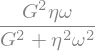

In [48]:
GPrime2 = tauSinInf.rhs.args[1]/(a*sp.cos(omega*t))
display(GPrime2)

We can write this moduli in terms of characteristic time (let me use here $t_c$ since $\lambda$ confuses python with the `lambda` function)

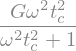

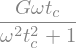

In [49]:
tc = sp.symbols('t_c',positive=True,real=True)
GPrime1 = GPrime1.subs(eta,tc*G).simplify()
GPrime2 = GPrime2.subs(eta,tc*G).simplify()
display(GPrime1)
display(GPrime2)

We can estimate the behavior of this two parameters as function of the frequency $\omega$ of the experiment, using the dimensionless time $\epsilon = \omega t_c$

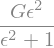

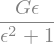

In [50]:
epsilon = sp.symbols('epsilon',positive=True,real=True)
GPrime1 = GPrime1.replace(omega,epsilon/tc)
GPrime2 = GPrime2.replace(omega,epsilon/tc)
display(GPrime1)
display(GPrime2)

Let's plot it...

In [51]:
GPrime1_f = sp.lambdify(epsilon,GPrime1/G)
GPrime2_f = sp.lambdify(epsilon,GPrime2/G)

In [52]:
tt = np.arange(0,5,0.01)

In [53]:
GPrime1_values = GPrime1_f(tt)
GPrime2_values = GPrime2_f(tt)

In [54]:
import matplotlib.pyplot as plt

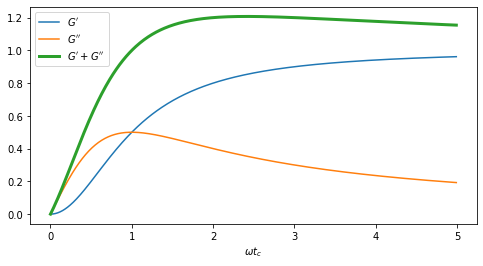

In [55]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(tt,GPrime1_values,label=r'$G^\prime$')
ax.plot(tt,GPrime2_values,label=r'$G^{\prime\prime} $')
ax.plot(tt,GPrime1_values+GPrime2_values,linewidth=3,label=r'$G^\prime + G^{\prime\prime} $')
ax.set_xlabel(r'$\omega t_c$')
ax.legend()

The value of $\tau$ for large $\omega$ gives $G^\prime$, the storage modulus. The slope of the curve for small $\omega$ allows the estimation of $G^{\prime\prime}$ the loss modulus and, hence, the viscous component of the fluid. That is the fundamentals of the [oscillatory rheometers](http://www.mate.tue.nl/~wyss/home/resources/publications/2007/Wyss_GIT_Lab_J_2007.pdf)

### Voigth-Kelvin element

However, Maxwell model does not explain most of the viscoelastic behavior. Another option is the  Voigth, or Kelvin, element 

![Image](VoigthKelvin.png)

In this element the strain $\gamma$ (displacement) are the same, and the stress $\tau$ (forces) are additives

$$ \gamma_1 = \gamma_2 = \gamma $$

$$\tau = \tau_1 + \tau_2 = G\gamma + \eta \dot\gamma $$

In [56]:
%reset -f

In [57]:
import sympy as sp
import numpy as np

In [58]:
t = sp.symbols('t')
eta,G = sp.symbols('eta,G',positive=True,real=True)

In [59]:
gamma = sp.Function('gamma')
tau = sp.Function('tau')
gammaDot = sp.Function('gammaDot')

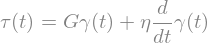

In [60]:
eq = sp.Eq(tau(t),G*gamma(t) + eta*gamma(t).diff(t))
display(eq)

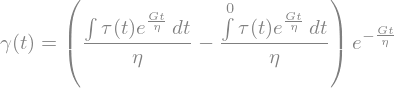

In [61]:
gammaSol = sp.dsolve(eq,gamma(t),simplify=True,ics={gamma(0):0},hint='Bernoulli')
gammaSol

In a **creep experiment**, a constant stress is applied and then the element is released

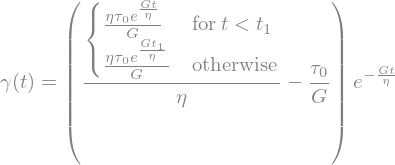

In [62]:
t1,tau0 = sp.symbols('t_1,tau_0',positive=True)
gammaSolTau0 = gammaSol.replace(tau(t),sp.Piecewise((tau0,t<t1),(0,t>=t1))).doit()
display(gammaSolTau0)

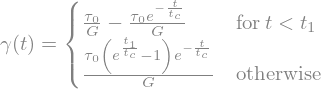

In [63]:
tc = sp.symbols('t_c',positive=True)
gammaSolTau0 = gammaSolTau0.replace(eta,G*tc).simplify()
display(gammaSolTau0)

$$\xi(t) = \gamma(t) \frac{G}{\tau_0}$$

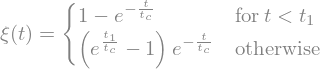

In [64]:
xi = sp.Function('xi')
xiEq = sp.Eq(xi(t),gammaSolTau0.rhs.replace(tau0,G))
display(xiEq)

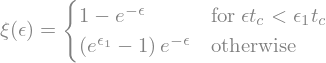

In [65]:
epsilon,epsilon1 = sp.symbols('epsilon, epsilon_1',positive=True)
xiEq = sp.Eq(xi(epsilon),xiEq.rhs.replace(t,tc*epsilon).replace(t1,tc*epsilon1))
display(xiEq)

In [66]:
xi_f = sp.lambdify((epsilon,epsilon1),xiEq.rhs)

In [67]:
tt = np.arange(0,5,0.01)
epsilon1 = 2
xi_values = xi_f(tt,epsilon1)

In [68]:
import matplotlib.pyplot as plt

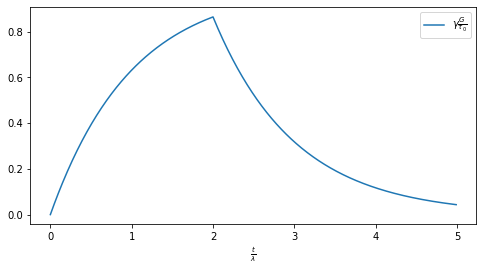

In [69]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(tt,xi_values,label=r'$\gamma\frac{G}{\tau_0}$')
ax.set_xlabel(r'$\frac{t}{\lambda}$')
ax.legend()

In this case, the characteristic time $\lambda = \frac{\eta}{G}$ is called **retardation time**. This model describes the behavior of a viscoelastic solid.

### Jeffreys-Burger element

However, Maxwell and Voight elements are not able to describe correctly real viscoelastic materials. The are several complex combinations of this elements, and the more usual is the Jeffreys (or Burger) element that replaces in the Maxwell element the spring by a Voight element.

![Image](JeffreysBurger.png)

Stress in both parts are the same

$$
\tau = \eta_1 \dot\gamma_1
$$
$$
\tau = G_2\gamma_2 + \eta_2\dot\gamma_2
$$

and, on the other side,
 
$$
\gamma = \gamma_1 + \gamma_2
$$
$$
\dot\gamma = \dot\gamma_1 + \dot\gamma_2
$$

By combining these equations, we can obtain

$$ \tau + \lambda_1\dot\tau = \eta_0\left(\dot\gamma + \lambda_2\ddot\gamma\right)$$

with 

$$
\lambda_1 = \frac{\eta_1+\eta_2}{G_2}\\
\eta_0 = \eta_1 \\
\lambda_2 = \frac{\eta_2}{G_2}
$$

There is a viscosity $\eta_0$ (or $\eta_1$), which is known as the viscosity of the fluid part (considered newtonian) and two characteristic times, $\lambda_1$ and $\lambda_2$, which are the relaxation and the retardation times, respectively.

In [70]:
%reset -f

In [71]:
import sympy as sp
import numpy as np

In [72]:
t = sp.symbols('t')
eta1,eta2,G2 = sp.symbols('eta_1,eta_2,G_2',positive=True,real=True)

In [73]:
gamma = sp.Function('gamma')
tau = sp.Function('tau')

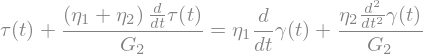

In [74]:
eq = sp.Eq(tau(t)+(eta1+eta2)/G2*tau(t).diff(t),eta1*gamma(t).diff(t)+eta2/G2*gamma(t).diff(t,2))
display(eq)

In [75]:
tauSol = sp.dsolve(eq,tau(t),hint='Bernoulli').doit()

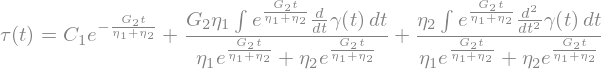

In [76]:
tauSol = tauSol.expand()
display(tauSol)

Again, first term can be neglected after a while

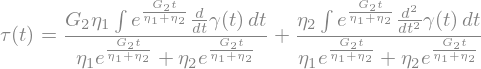

In [77]:
tauSolInf=tauSol.replace(tauSol.rhs.args[0],0)
display(tauSolInf)

### Extension to vectorial notation

Maxwell model is written, in vector and tensor notation as

$$ \boldsymbol{\tau} + \lambda \stackrel{\triangledown}{\boldsymbol{\tau}} = \eta \boldsymbol{\dot\gamma} = \eta \left(\nabla \boldsymbol{u} + \nabla \boldsymbol{u}^T \right) $$

where $\stackrel{\triangledown}{\boldsymbol{\tau}}$ is the Upper Convective Time Derivative, defined as

$$ \stackrel{\triangledown}{\boldsymbol{\tau}} = \dot{\boldsymbol{\tau}} - \nabla \boldsymbol{u}\cdot\boldsymbol{\tau} - \boldsymbol{\tau}\cdot \nabla \boldsymbol{u}^T $$

In a similar way, Jeffreys model is written as

$$ \boldsymbol{\tau} + \lambda_1 \stackrel{\triangledown}{\boldsymbol{\tau}} = \eta \left( \boldsymbol{\dot\gamma} + \lambda_2 \stackrel{\triangledown}{\boldsymbol{\dot\gamma}}\right) $$

known as the [**Oldroyd-B** model](https://en.wikipedia.org/wiki/Oldroyd-B_model)

In [79]:
try:
    %load_ext watermark
except:
    !pip install watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.0.1

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.4.0-144-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sympy: 1.7.1
numpy: 1.22.2

